In [2]:
#libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import math
import random
import csv

In [203]:
#take out all the [0,0]
def pluckzeros(clusters, count, num):
    values = [[0] * num] * count
    k = 0
    #takeout all zeros
    for i in range(len(clusters)):
        if clusters[i] != [0] * num:
            values[k] = clusters[i]
            k += 1
    return values


#kmeans Function
def kmeans(clusters):
    xval = 0
    yval = 0
    for i in range(len(clusters)):
        xval += clusters[i][0]
        yval += clusters[i][1]
    xval /= len(clusters)
    yval /= len(clusters)
    return [xval, yval]

def kmeans4D(clusters):
    xval = 0
    yval = 0
    wval = 0
    zval = 0
    for i in range(len(clusters)):
        xval += clusters[0][i][0]
        yval += clusters[0][i][1]
        wval += clusters[0][i][2]
        zval += clusters[0][i][3]
    xval /= len(clusters)
    yval /= len(clusters)
    wval /= len(clusters)
    zval /= len(clusters)
    return [xval, yval, wval, zval]
            
def euclidean(data, cent1, cent2, cent3):
    count1 = 0
    count2 = 0
    count3 = 0
    val1 = 0
    val2 = 0
    val3 = 0
    group1 = [[0] * 4] * len(data)
    group2 = [[0] * 4] * len(data)
    group3 = [[0] * 4] * len(data)
    
    
    for i in range(len(data)):
        val1 = 0
        val2 = 0
        val3 = 0
        for j in range(len(cent1)):
            val1 += math.sqrt((data[i][j] - cent1[j])**2)
            val2 += math.sqrt((data[i][j] - cent2[j])**2)
            val3 += math.sqrt((data[i][j] - cent3[j])**2)
            
        if val1 < val2 and val1 < val3:
            group1[i] = data[i]
            count1 += 1
            
        elif val2 < val1 and val2 < val3:
            group2[i] = data[i]
            count2 += 1
            
        else:
            group3[i] = data[i]
            count3 += 1
            
    return [[pluckzeros(group1, count1, 4)], [pluckzeros(group2, count2, 4)], [pluckzeros(group3, count3, 4)]]
            
def cosineKmeans(data, cent1, cent2, cent3):
    count1 = 0
    count2 = 0
    count3 = 0
    group1 = [[0] * 4] * len(data)
    group2 = [[0] * 4] * len(data)
    group3 = [[0] * 4] * len(data)
    
    for i in range(len(data)):
        val1 = 0
        val2 = 0
        val3 = 0
        for j in range(len(cent1)):
            val1 += (data[i][j] * cent1[j]) / (math.sqrt(data[i][j])** 2 * math.sqrt(cent1[j])**2)
            val2 += (data[i][j] * cent2[j]) / (math.sqrt(data[i][j])** 2 * math.sqrt(cent2[j])**2)
            val3 += (data[i][j] * cent3[j]) / (math.sqrt(data[i][j])** 2 * math.sqrt(cent3[j])**2)
        val1 = 1 - val1
        val2 = 1 - val2
        val3 = 1 - val3
            
        if val1 < val2 and val1 < val3:
            group1[i] = data[i]
            count1 += 1
            
        elif val2 < val1 and val2 < val3:
            group2[i] = data[i]
            count2 += 1
            
        else:
            group3[i] = data[i]
            count3 += 1
            
    return [[pluckzeros(group1, count1, 4)], [pluckzeros(group2, count2, 4)], [pluckzeros(group3, count3, 4)]]
    
    
def jaccard(data, cent1, cent2, cent3):
    count1 = 0
    count2 = 0
    count3 = 0
    group1 = [[0] * 4] * len(data)
    group2 = [[0] * 4] * len(data)
    group3 = [[0] * 4] * len(data)
    
    for i in range(len(data)):
        val1 = 0
        val2 = 0
        val3 = 0
        
        if min(data[i]) < min(cent1):
            num = min(data[i])
        else:
            num = min(cent1)
        
        if max(data[i]) > max(cent1):
            dom = max(data[i])
        else:
            dom = max(cent1)
            
        val1 += num / dom
        

        if min(data[i]) < min(cent2):
            num = min(data[i])
        else:
            num = min(cent2)
        
        if max(data[i]) > max(cent2):
            dom = max(data[i])
        else:
            dom = max(cent2)
            
        val2 += num / dom
        
        
        
        if min(data[i]) < min(cent3):
            num = min(data[i])
        else:
            num = min(cent3)
        
        if max(data[i]) > max(cent3):
            dom = max(data[i])
        else:
            dom = max(cent3)
            
        val3 += num / dom
        
        
        val1 = 1 - val1
        val2 = 1 - val2
        val3 = 1 - val3
            
        if val1 < val2 and val1 < val3:
            group1[i] = data[i]
            count1 += 1
            
        elif val2 < val1 and val2 < val3:
            group2[i] = data[i]
            count2 += 1
            
        else:
            group3[i] = data[i]
            count3 += 1
            
    return [[pluckzeros(group1, count1, 4)], [pluckzeros(group2, count2, 4)], [pluckzeros(group3, count3, 4)]]
    
    

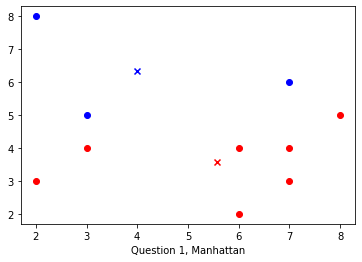

for red the centroid =  [5.571428571428571, 3.5714285714285716]
for blue the centroid =  [4.0, 6.333333333333333]


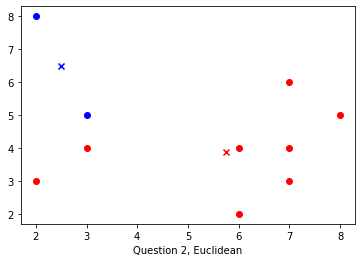

for red the centroid =  [5.75, 3.875]
for blue the centroid =  [2.5, 6.5]


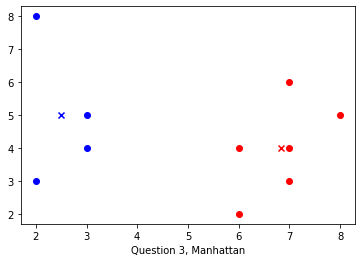

for red the centroid =  [6.833333333333333, 4.0]
for blue the centroid =  [2.5, 5.0]


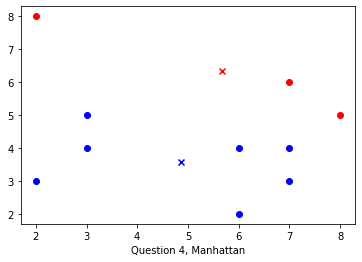

for red the centroid =  [5.666666666666667, 6.333333333333333]
for blue the centroid =  [4.857142857142857, 3.5714285714285716]


In [66]:
#TASK1


#Points
data = [[3,5], [3,4], [2,8], [2,3], [6,2], [6,4], [7,3], [7,4], [8,5], [7,6]]
cluster1 = [[0] * 2] * 10
cluster2 = [[0] * 2] * 10
count = 0


#Centroids Q 1 & 2
cent1 = [4,6]
cent2 = [5,4]

#Centroids Q 3
cent3 = [3,3]
cent4 = [8,3]

#Centroids Q 4
cent5 = [3,2]
cent6 = [4,8]

########################################################################

#Manhattan Distance Q1
for i in range(len(data)):
    for j in range(1):
        if (abs(data[i][j] - cent1[0]) + abs(data[i][j+1] - cent1[1])) > (abs(data[i][j] - cent2[0]) + abs(data[i][j+1] - cent2[1])):
            plt.scatter(data[i][j], data[i][j+1], color = "red")
            cluster1[i] = data[i]
            count += 1

        else:
            plt.scatter(data[i][j], data[i][j+1], color = "blue")
            cluster2[i] = data[i]
            

#takes out all [0,0]
cluster1 = pluckzeros(cluster1, count, 2)
cluster2 = pluckzeros(cluster2, len(data) - count, 2)

#Clusters
new_cent1 = kmeans(cluster1)
new_cent2 = kmeans(cluster2)


#plot calculated centroids
plt.scatter(new_cent1[0], new_cent1[1], color = "red", marker = "x")
plt.scatter(new_cent2[0], new_cent2[1], color = "blue", marker = "x")



plt.xlabel("Question 1, Manhattan")            
plt.show()

print("for red the centroid = ", new_cent1)
print("for blue the centroid = ", new_cent2)

########################################################################
#reset back to reuse
cluster1 = [[0] * 2] * 10
cluster2 = [[0] * 2] * 10
count = 0
new_cent1 = 0
new_cent2 = 0

#Euclidean Distance Q2
for i in range(len(data)):
    for j in range(1):
        if (
            math.sqrt((data[i][j] - cent1[0])**2 + (data[i][j+1] - cent1[1])**2) > 
            math.sqrt((data[i][j] - cent2[0])**2 + (data[i][j+1] - cent2[1])**2)
        ):
            plt.scatter(data[i][j], data[i][j+1], color = "red")
            cluster1[i] = data[i]
            count += 1
        else:
            plt.scatter(data[i][j], data[i][j+1], color = "blue")
            cluster2[i] = data[i]

            
#takes out all [0,0]
cluster1 = pluckzeros(cluster1, count, 2)
cluster2 = pluckzeros(cluster2, len(data) - count, 2)

#Clusters
new_cent1 = kmeans(cluster1)
new_cent2 = kmeans(cluster2)

#plot calculated centroids
plt.scatter(new_cent1[0], new_cent1[1], color = "red", marker = "x")
plt.scatter(new_cent2[0], new_cent2[1], color = "blue", marker = "x")


plt.xlabel("Question 2, Euclidean")            
plt.show()

print("for red the centroid = ", new_cent1)
print("for blue the centroid = ", new_cent2)

########################################################################
#reset back to reuse
cluster1 = [[0] * 2] * 10
cluster2 = [[0] * 2] * 10
count = 0
new_cent1 = 0
new_cent2 = 0

#Manhattan Distance Q3
for i in range(len(data)):
    for j in range(1):
        if(abs(data[i][j] - cent3[0]) + abs(data[i][j+1] - cent3[1])) > (abs(data[i][j] - cent4[0]) + abs(data[i][j+1] - cent4[1])):
            plt.scatter(data[i][j], data[i][j+1], color = "red")
            cluster1[i] = data[i]
            count += 1
        else:
            plt.scatter(data[i][j], data[i][j+1], color = "blue")
            cluster2[i] = data[i]


#takes out all [0,0]
cluster1 = pluckzeros(cluster1, count, 2)
cluster2 = pluckzeros(cluster2, len(data) - count, 2)

#Clusters
new_cent1 = kmeans(cluster1)
new_cent2 = kmeans(cluster2)

#plot calculated centroids
plt.scatter(new_cent1[0], new_cent1[1], color = "red", marker = "x")
plt.scatter(new_cent2[0], new_cent2[1], color = "blue", marker = "x")



plt.xlabel("Question 3, Manhattan")            
plt.show()

print("for red the centroid = ", new_cent1)
print("for blue the centroid = ", new_cent2)

########################################################################
#reset back to reuse
cluster1 = [[0] * 2] * 10
cluster2 = [[0] * 2] * 10
count = 0
new_cent1 = 0
new_cent2 = 0

#Manhattan Distance Q4
for i in range(len(data)):
    for j in range(1):
        if(abs(data[i][j] - cent5[0]) + abs(data[i][j+1] - cent5[1])) > (abs(data[i][j] - cent6[0]) + abs(data[i][j+1] - cent6[1])):
            plt.scatter(data[i][j], data[i][j+1], color = "red")
            cluster1[i] = data[i]
            count += 1
        else:
            plt.scatter(data[i][j], data[i][j+1], color = "blue")
            cluster2[i] = data[i]

            
            
#takes out all [0,0]
cluster1 = pluckzeros(cluster1, count, 2)
cluster2 = pluckzeros(cluster2, len(data) - count, 2)

#Clusters
new_cent1 = kmeans(cluster1)
new_cent2 = kmeans(cluster2)

#plot calculated centroids
plt.scatter(new_cent1[0], new_cent1[1], color = "red", marker = "x")
plt.scatter(new_cent2[0], new_cent2[1], color = "blue", marker = "x")
            
plt.xlabel("Question 4, Manhattan")            
plt.show()

print("for red the centroid = ", new_cent1)
print("for blue the centroid = ", new_cent2)

########################################################################


In [216]:
#TASK 2


count1 = 0
count2 = 0
count3 = 0


#randomly generated centroids
cent1 = [random.randint(0,9) for i in range(4)]
cent2 = [random.randint(0,9) for i in range(4)]
cent3 = [random.randint(0,9) for i in range(4)]


print("randomized centroid = ", cent1)
print("randomized centroid = ", cent2)
print("randomized centroid = ", cent3)

#data setup
data = pd.read_csv("iris.data", names=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'name'])
data = data.drop(columns = 'name')
data = np.asarray(data)
data = data.tolist()


#Euclidean Distance
for i in range(100):
    euclid = euclidean(data, cent1, cent2, cent3)
    cent1 = kmeans4D(euclid[0])
    cent2 = kmeans4D(euclid[1])
    cent3 = kmeans4D(euclid[2])

Enew_cent1 = cent1
Enew_cent2 = cent2
Enew_cent3 = cent3

print("")
print("euclidean new centroid for setosa = ", Enew_cent1)
print("euclidean new centroid for versicolor = ", Enew_cent2)
print("euclidean new centroid for virginica = ", Enew_cent3)

#Cosine
for i in range(100):
    cosine = cosineKmeans(data, cent1, cent2, cent3)
    cent1 = kmeans4D(cosine[0])
    cent2 = kmeans4D(cosine[1])
    cent3 = kmeans4D(cosine[2])

#Cosine - K means
Cnew_cent1 = cent1
Cnew_cent2 = cent2
Cnew_cent3 = cent3

print("")
print("cosineKmeans new centroid for setosa = ", Cnew_cent1)
print("cosineKmeans new centroid for versicolor = ", Cnew_cent2)
print("cosineKmeans new centroid for virginica = ", Cnew_cent3)
    
#Jaccard
#for i in range(100):
#    jaccard = jaccard(data, cent1, cent2, cent3)
#    cent1 = kmeans4D(jaccard[0])
#    cent2 = kmeans4D(jaccard[1])
#    cent3 = kmeans4D(jaccard[2])


#Jaccard - K means
#Jnew_cent1 = cent1
#Jnew_cent2 = cent2
#Jnew_cent3 = cent3


#print("")
#print("Jaccard new centroid for setosa = ", Jnew_cent1)
#print("Jaccard new centroid for versicolor = ", Jnew_cent2)
#print("Jaccard new centroid for virginica = ", Jnew_cent3)


randomized centroid =  [7, 7, 6, 7]
randomized centroid =  [4, 6, 5, 5]
randomized centroid =  [9, 5, 8, 7]

euclidean new centroid for setosa =  [7.0, 3.2, 4.7, 1.4]
euclidean new centroid for versicolor =  [5.1, 3.5, 1.4, 0.2]
euclidean new centroid for virginica =  [6.3, 3.3, 6.0, 2.5]

cosineKmeans new centroid for setosa =  [4.7, 3.2, 1.3, 0.2]
cosineKmeans new centroid for versicolor =  [5.1, 3.5, 1.4, 0.2]
cosineKmeans new centroid for virginica =  [4.6, 3.1, 1.5, 0.2]


the farthest distance between the two points =  2.109502310972899
the shortest distance between the two points =  0.1414213562373093
The average distance between all points =  0.9829734914720504


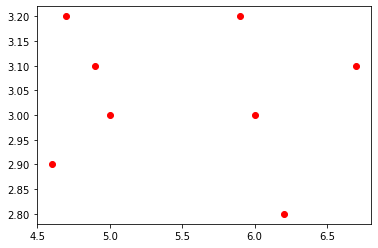

In [133]:
#task 3
data = [[4.7, 3.2], [4.9, 3.1], [5.0, 3.0], [4.6, 2.9], [5.9, 3.2], [6.0, 3.0], [6.2, 2.8], [6.7, 3.1]]

for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1], color = "red")

plt.plot()

#A [4.6, 2.9], [6.7, 3.1]
long = math.sqrt((4.6 - 6.7)**2 + (2.9 - 3.1)**2)
print("the farthest distance between the two points = ", long)

#B [4.9, 3.1], [5.0, 3.0]
short = math.sqrt((4.9 - 5.0)**2 + (3.1 - 3.0)**2)
print("the shortest distance between the two points = ", short)

#C Average Distance
from itertools import combinations

def dist(p1, p2):
    (x1, y1), (x2, y2) = p1, p2
    return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

x = [4.7, 4.9, 5.0, 4.6, 5.9, 6.0, 6.2, 6.7]
y = [3.2, 3.1, 3.0, 2.9, 3.2, 3.0, 2.8, 3.1]

points = list(zip(x,y))
distances = [dist(p1, p2) for p1, p2 in combinations(points, 2)]
avg_distance = sum(distances) / len(distances)
print("The average distance between all points = ", avg_distance)